<a href="https://colab.research.google.com/github/yeymix/bootcampIA/blob/main/TallerClustering_K_meas_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore")

# Procesamiento de los datos.

In [3]:
uploaded = files.upload()

Saving wine-clustering.csv to wine-clustering.csv


In [4]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [6]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
# Reducción de dimensiones a 2D para visualización
pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaled_df)
data_2d

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

# Aplicación del algoritmo K-means.

In [8]:
# Definir el número de clústeres
kmeans = KMeans(n_clusters=3, random_state=0)

# Ajustamos el modelo
kmeans.fit(data_2d)

# Asignar los clústeres a los datos
df['Cluster'] = kmeans.labels_
# df.head()

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [ ]:
#df_pca = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
#df_pca.head()

# Gráfico y métricas de evaluación.

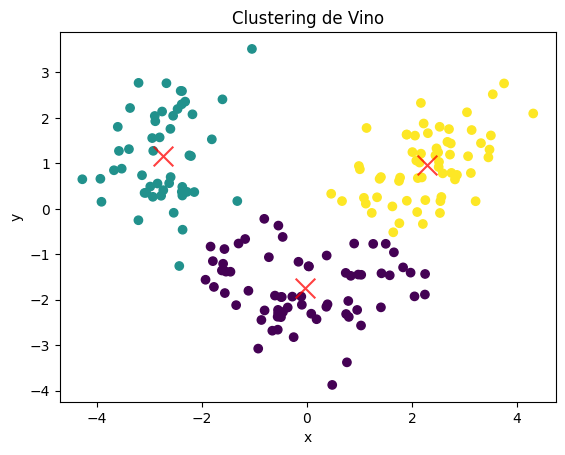

In [9]:
# Crear gráfico de dispersión
plt.scatter(data_2d[:,0], data_2d[:,1], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clustering de Vino')
plt.show()


## Método del Codo

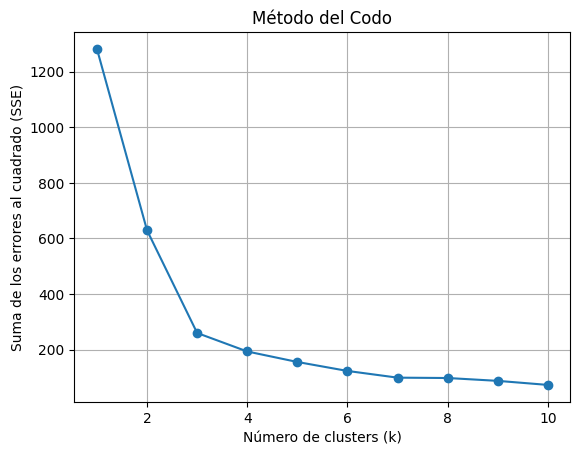

In [10]:
# Lista para almacenar la suma de los errores al cuadrado (SSE)
sse = []

# Probar KMeans con k desde 1 hasta 10
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_2d)
    sse.append(kmeans.inertia_)  # inercia es la SSE

# Graficar el método del codo
plt.plot(k_values, sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de los errores al cuadrado (SSE)')
plt.grid(True)
plt.show()

## Coeficiende de Silueta

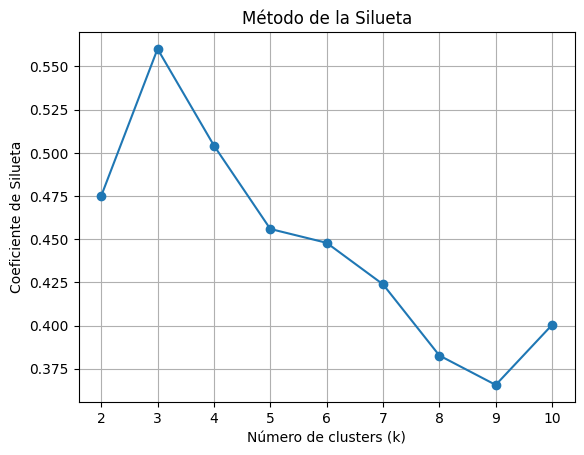

In [11]:
# Lista para almacenar las puntuaciones de silueta
silhouette_scores = []

# Probar KMeans con k desde 2 hasta 10 (Nota: la silueta no está definida para k=1)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data_2d)
    silhouette_avg = silhouette_score(data_2d, labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el método de la silueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)
plt.show()

## Índices de Davies-Bouldin

In [12]:
# Calcular el Índice de Davies-Bouldin
dbi = davies_bouldin_score(data_2d, labels)
print(f'Índice de Davies-Bouldin: {dbi}')

Índice de Davies-Bouldin: 0.8150347366936304


## Calinski-Harabasz.

In [13]:
# Calcular el Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(data_2d, labels)
print(f'Índice de Calinski-Harabasz: {ch_score}')

Índice de Calinski-Harabasz: 308.46662008399005


# Aplicación práctica del clustering:

Agrupación de los vinos en distintas categorías, lo cual permitiría darles una caracterización en el mercado.

Ejemplo. Textura, Tipo, Color.

Así mismo se podría realizar recomendaciones o elegir el mercado específico. Por ejemplo qué tipos de alimentos van con cada vino.

In [14]:
# Agrupar por clúster y calcular estadísticas descriptivas
cluster_summary = df.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Mostrar el resumen
cluster_summary

Alcohol                                 Malic_Acid         \
              mean  median       std    min    max       mean median   
Cluster                                                                
0        12.268955  12.290  0.536301  11.03  13.86   1.883433  1.610   
1        13.144000  13.135  0.522310  12.20  14.34   3.346200  3.285   
2        13.686721  13.740  0.558175  11.56  14.83   2.006066  1.770   

                               ...     OD280                               \
              std   min   max  ...      mean median       std   min   max   
Cluster                        ...                                          
0        1.000089  0.74  5.80  ...  2.783582   2.83  0.474705  1.59  3.64   
1        1.068136  1.24  5.65  ...  1.698800   1.68  0.277214  1.27  2.47   
2        0.678160  1.35  4.04  ...  3.171148   3.17  0.361580  2.51  4.00   

             Proline                                 
                mean  median         std  min   max  
Cluster                                              
0         516.880597   495.0  153.956558  278  1020  
1         622.440000   622.5  119.484976  372   880  
2        1101.540984  1080.0  234.420674  465  1680  

[3 rows x 65 columns]

**Observaciones generales:**

**Clúster 1:** Parece agrupar vinos con mayor contenido de alcohol y mayor contenido de prolina, lo que sugiere que podrían ser vinos más robustos y complejos, quizás de más alta gama o con mayor potencial de envejecimiento.

**Clúster 2:** tiene vinos con mayor acidez, lo que podría asociarse a vinos más frescos o jóvenes.

**Clúster 0:** presenta vinos con menor acidez y alcohol, lo que los hace más ligeros.

Esta segmentación podría ser útil para categorizar vinos en función de preferencias de consumidores o mercados, por ejemplo, clientes que prefieren vinos más ligeros o más complejos y envejecidos.

# Evaluación del mejor método

Para ayudar a determinar una cantidad de K más precisa, la mejor opción en este caso, fue el Coeficiente de Silueta. Además es más preciso en el rango parala interpretación. En este caso, está más cerca de 1 que de 0, sin embargo, por estar en 0.58 está indicando que podría haber ambiguedad en algunos puntos.